# Local Search

local search is a heuristic method for solving computationally hard optimization problems. Local search can be used on problems that can be formulated as finding a solution maximizing a criterion among a number of candidate solutions. Local search algorithms move from solution to solution in the space of candidate solutions (the search space) by applying local changes, until a solution deemed optimal is found or a time bound is elapsed.

As you can see, in local search, the path to the goal is not important to us and we're only trying to find the state of the goal. In many problems our purpose is to find that goal state rather than the path that takes us there. 

#### 1. Path to goal is important

- 8-Puzzle
- Chess
- Theorem proving
- Route finding

##### 1.1. Goal state itself is important

- 8 Queens
- TSP
- Job-Shop Scheduling
- Automatic program generation
- VLSI Layout

### 2. Partial state formulation vs. Complete state formulation

In partial state formulation, each path represent a solution to the problem (as we have seen the systematic exploration of search graph) but in complete state formulation each state represent a solution to the problem.

#### 2.1. Time and memory complexity 
As you have seen previously, In Systematic exploration of search space, the memory was exponential. But here it's reduced to O(1) instead and the computational time complexity reduced from exponential to O(T) where we choose such T to limit the number of iterations.

## 3. Constraint Satisfaction vs. Constraint Optimization

In constraint satisfaction problems, we look for states that satisfy some constraints (e.g. in-queens problem, where the constraints are: no two queens can attack each other). In the other hand, in constraint optimization, beside satisfying some constraints, we are looking for optimizing an objective function (whether minimizing or maximizing) (e.g. TSP where the objective function is to minimize the total weight of the edges)

We can convert a constraint satisfaction problem to a constraint optimization problem. for example consider the n-queens problem. we can set our objective function 
> h = # pairs of queens that attack each other

or

> h = # constraints that are violated

and then we can solve the optimization version of the problem.

We also can convert a constraint optimization problem to **some** constraint satisfaction problems (Can do something like a binary search or we can do it in linear time. e.g. for minimizing function *f* we set a constraint *f=a* (for some reasonable a) and at each step we solve the constraint satisfaction version of the problem and decrease *a* by one)

## 4. Trivial Algorithms

* ### Random Sampling
Generate a state randomly at each step and keep the optimal one and update it at each iteration

* ### Random Walk
Randonmly pick a **neighbor** of the current state

Both algorithms are asymptotically complete (If the state space is finite, each state is visited at a fixed rate asymptotically)

## 5. Hill Climbing

a better solution is to use a local search algorithm that continuously moves in the direction of increasing elevation/value to find the peak of the mountain or the best solution to the problem. **Hill-climbing algorithm** terminates when it reaches a peak value where no neighbor has a higher value.
Note that, in this algorithm nodes only contain the state and the value of the objective function in that state (not path) so may see previous states.  
It is also called **greedy local search** as it only looks to its good immediate neighbor state and not beyond that. This may seem like a good thing, but it's not: hill climbing can get stuck in a local optimum easily so its convergence depends on the **initial state**.


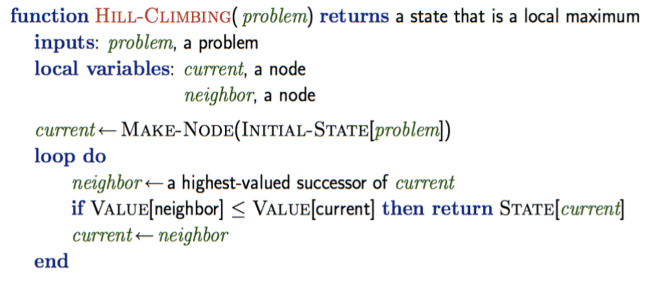

### 5.1. Example: 8-queens problem:
States: 8 queens on the board, one per column (8<sup>8</sup> ≈ 17 𝑚𝑖𝑙𝑙𝑖𝑜𝑛)  
Successors(s): all states resulted from 𝑠 by moving a single queen to another square of the same column (8 × 7 = 56)  
Cost function ℎ(s): number of queen pairs that are attacking each other, directly or indirectly.  
Global minimum: ℎ(s) = 0  


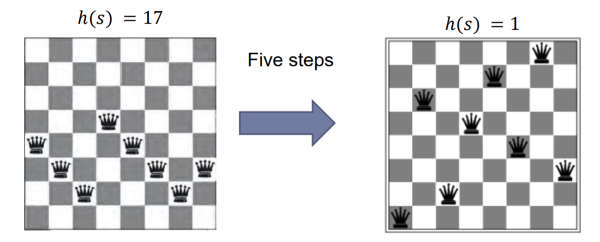

in the above example, the hill-climbing algorithm converges to h = 1 and it can't do any action to improve h, so it stuck at the local minimum.  
### 5.2. 8-queens statistics:
*	State-space of size ≈17 million  
*	Starting from a random state, steepest-ascent hill-climbing solves **14%** of the problem instances and 86% of the time getting stuck.  
*	It takes **4 steps** on average when it succeeds, 3 when it gets stuck.  


### 5.3. Hill-climbing properties:  

*	**Not complete**: because doesn't have memory and may see **repetitive states** and also has issues with **local optimal**.  
* In the worst case has a terrible running time.  
*	The space complexity of O(1).  
*	Simple and often very fast.  

So the solutions to improve the Hill-climbing algorithm take into account **recurring states** and **local optimal**.  


For **convex** or **concave** functions, like the examples below, the hill-climbing algorithm gets the optimal solution, because the local optimal is the **same** as global optimal.  
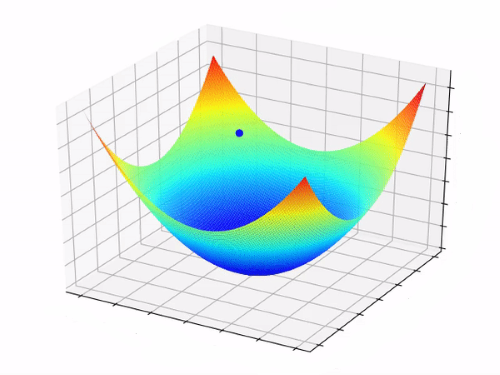

### 5.4. Hill-climbing search problems:
*	**Local optimal** (except convex/concave functions that mentioned before)
*	**Plateau**: a flat area (flat local optima, shoulder)    
  
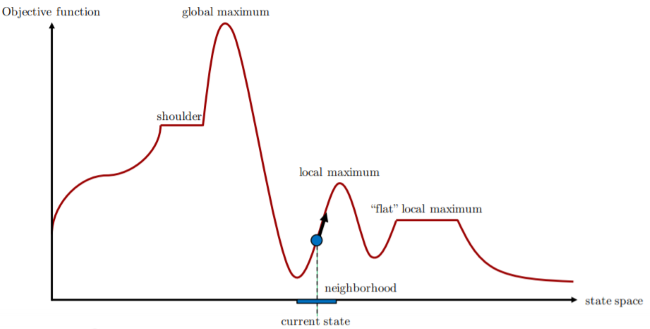
  
  
  



* **Diagonal ridges**: From each local maximum all the available actions point downhill, but there is an uphill path!  

  
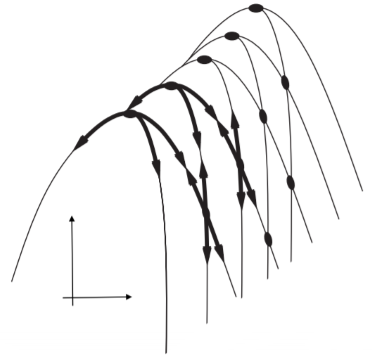

### 5.5. Sideway moves
In some problems, like n-queens, converging to local optimal isn't acceptable and should find some better solutions.  
A solution that may help is to use **sideway moves**: If no downhill (uphill) moves, allow sideways moves in hope that the algorithm can escape shoulders. There might be a limit to the number of sideway moves allowed to avoid infinite loops.  
For the 8-queens problem, if set 100 for the sideway moves limit, the percentage of problems solved raises from 14 to **94%**, and 21 steps are needed for every successful solution, 64 for each failure. So using sideway moves the probability of convergence to optimal solution increases but the converge time increases too.  
When **sideway moves** are allowed, performance improves ...


### 5.6. Stochastic Variations
Another solution that helps hill-climbing to be complete, is **Stochastic Variations**. When the state-space landscape has local optima, any search that moves only in the greedy direction cannot be complete.  
the idea of stochastic variations is to combine **random-walk** and **greedy hill-climbing**.  
At each step do one of the following:  
*	**Greedy**: With probability, p moves to the neighbor with the largest value.
*	**Random**: With probability, 1-p moves to a random neighbor.


### 5.7. Random-restart Hill-climbing
All previous versions are **incomplete** because of getting stuck on local optima, but the **random-restart hill-climbing** gives a complete algorithm.  
In random-restart hill-climbing, start with the **initial random state**, and if terminates with the failure, choose another initial random state, and so on...  
 If **p** be the probability of success in each hill-climbing search, then the **expected number of restarts will be 1/p**.  
When multiple restarts are allowed, performance improves...


### 5.8. Hill-Climbing with both Random Walk & Random Sampling
If we want to increase the randomness we can combine ideas of **greedy local search**, **random walk**, and **random restart**.
At each step do one of the three with the same probability:
*	**Greedy**: move to the neighbor with the largest value
*	**Random Walk**: move to a random neighbor
*	**Random Restart**: Start over from a new, random state



### 5.9. Tabu search:
**Tabu Search** works like hill-Climbing, but it maintains a **tabu list** of constant size, like k, to avoid getting stuck in local optima. The tabu list holds k recent used objects that are taboo to use for now. Moves that involve an object in the tabu list, are not accepted.
Tabu search raises the space complexity from O(1) to O(k) but in many problems that use sideway moves, it improves the performance of hill-climbing.


## 6. Simulated annealing

__Simulating annealing (SA)__ is one the search algorithms.The idea which is used for SA is close to random walking in other search algorithms. SA uses physical concepts for escaping local optimas by allowing some bad moves and gradually decreasing their size and frequency because if these bad moves go on and the answer be somewhere near global optima, it will get far from global optima.This method proposed in 1983 by IBM researchers for solving VLSI layout problems.

Let's have a look at a physical analogy:
- Imagine letting a ball roll downhill on the function surface
- Now shake the surface, while the ball rolls
- Gradually reduce the amount of shaking

The picture below demonstraits the places where ball probably will be and the next state is getting closer to goal state which is global optima:
![](https://c.mql5.com/2/30/pic1__1.png)

Simulated annealing refers to the process of cooling a liquid until it form crystalline shape. This physiacal process must be done slowly to form better crystalline shapes.At first molecules of liquid have too much kinetic energy and are moving so fast with brownian motions, by cooling it slowly seems that the energy is getting less and less. In this process due to the fact that we are reducing the temperature gradually, number of bad moves or moves with too much energy will decrease until it converges to global optima.

Based on this intuition:
- Define a variable named T for the temperature.
- The value of T is high at first.
- According to temperature schedule, reduce this value.
    - In high temperature probability of "locally bad" moves is higher.
    - In low temperature probability of "locally bad" moves is lower.

### 6.1. Pseudocode

The following pseudocode presents the simulated annealing heuristic as described above:

![](https://drive.google.com/uc?id=1sYyFerzhiD5c9ljnOxXh1xe_e4pTpvBb)

### 6.2. Effect of temperature

This picture illustrates 2 points:
- At first, the high temprature causes more bad moves and the acceptation probability drops slowly(low slope).
- As the temperature decreases, the bad moves' probability converges to zero so fast(high slope).

![](https://drive.google.com/uc?id=141Fbhv_k3EsSnnjn9iK6uEtZfoiwC5iQ)


In this exmaple, SA is searching for a maximum. By cooling the temperature slowly, the global maximum is found. 

![](https://upload.wikimedia.org/wikipedia/commons/d/d5/Hill_Climbing_with_Simulated_Annealing.gif)

### 6.3. Simulated Annealing in practice

__How to define this schedulability?__
<br/>
There is only one theorem about this.
<br/>
_Theorem_: If T is decreased sufficiently slow, global optima will be found approximately with probability of 1.
<br/>
__Is this rate same for all problems?__
<br/>
No, it depends on the problem.
<br/>
__Now, Is this theorem a useful guarantee?__
<br/>
Convergence can be guaranteed if at each step, T drops no more quickly than $\frac{C}{log n}$, where C is a constant and problem dependent and n is the number of steps so far.In practice different Cs are used to find the best choice for problem.

### 6.4. Other applications

- [Traveling salesman](https://en.wikipedia.org/wiki/Travelling_salesman_problem)
- [Graph partitioning](https://en.wikipedia.org/wiki/Graph_partition)
- [Graph coloring](https://en.wikipedia.org/wiki/Graph_coloring)
- [Scheduling](https://en.wikipedia.org/wiki/Scheduling_(computing))
- [Facility layout](https://www.managementstudyguide.com/facility-layout.htm)
- [Image processing](https://en.wikipedia.org/wiki/Digital_image_processing)
- ...

## 7. Local beam search

Keeping only one node in memory is an extreme reaction to memory problems.
<br/>
__Local beam search__ is another algorithm which keeps track of k states instead of keeping only one node in memory.

**Now, How?**
<br/>
- Initially: Select k states randomly. 
- Next: Determine all successors of k states.
- If any successor is goal, search has finished.
- Else select k best from successors and repeat.

This is an example of **Local Beam Search** when k = 3:

![](https://drive.google.com/uc?id=1_gM_D-DOyocGiILT01McZKDLXhscjbmj)


$\star$ Note that this algorithm is not the same as k random-start searches run in parallel. In Beam search, searches that find good states recruit other searches to join them.


### 7.1. Stochastic Beam Search

Quite often, all k states end up on same local hill.
<br/>
__So, What should be done?__
<br/>
The idea is to use **Stochastic beam search** which chooses k successors randomly,biased towards good ones.

### 7.2. Uses

This algorithm has many uses in:
- MT ([Machine Translation](https://en.wikipedia.org/wiki/Machine_translation))
- NLP ([Natural Language Processing](https://en.wikipedia.org/wiki/Natural_language_processing))

## 8. Genetic Algorithms

- ### A variant of stochastic beam search
Successors can be generated by combining two parent states rather than modifying a single state


### 8.1. Algorithm

- A State (solution) is represented as a string over a finite alphabet (e.g. a chromosome containing genes)

- Start with *k* randomly generated states (**Population**)

- Evaluation function to evaluate states (Higher values for better states) (**Fitness function**)

- Combining two parent states and getting offsprings (**Cross-over**)
  - Cross-over point can be selected randomly

- Reproduced states can be slightly modified with a probability of *P* (**mutation**)

- The next generation of states is produces by selection (based on fitness function), crossover and mutation 


Keeping all these in mind, we will go into more detail in the below example

### 8.2. Example: 8-Queens


- Describe the state as a string

  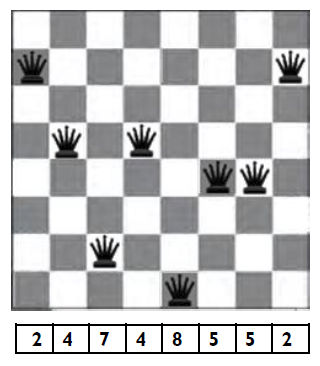

- **Fitness function** : number of non-attacking pairs of queens (24 for above figure)

- **Cross-over** : To select some part of the state from one parent and the rest from another

  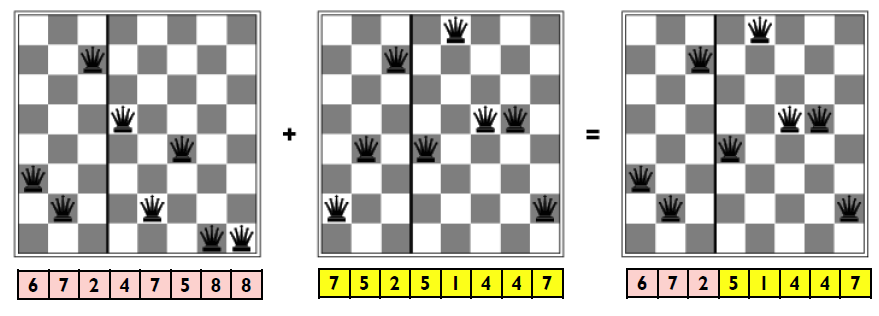

- **Mutation** : To change a small part of one state with a small probability 

  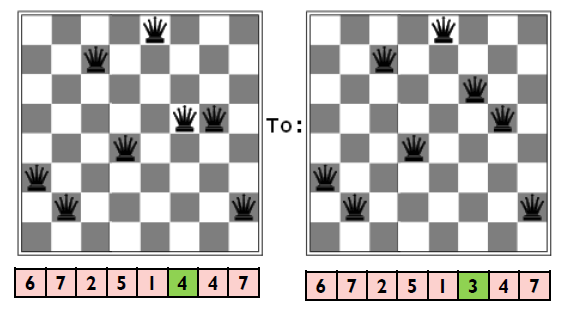

- **Selection** : We can also have a selection step that selects from the population and the probability of the selection of each individual in population is with respect to it's fitness value (See example below)

### 8.3. Another variant of genetic algorithm for 8-Queens

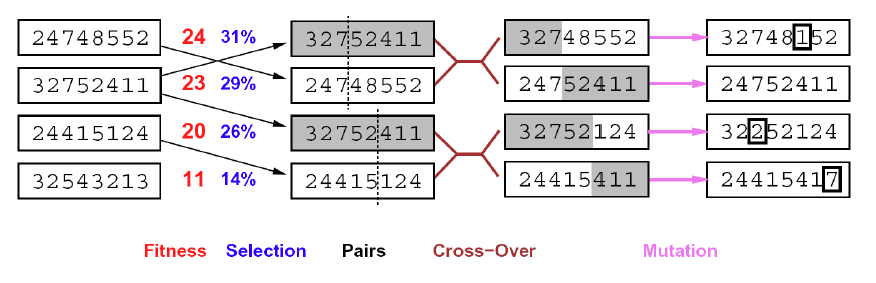

And in the picture below you can see the way we calculated the fitness function

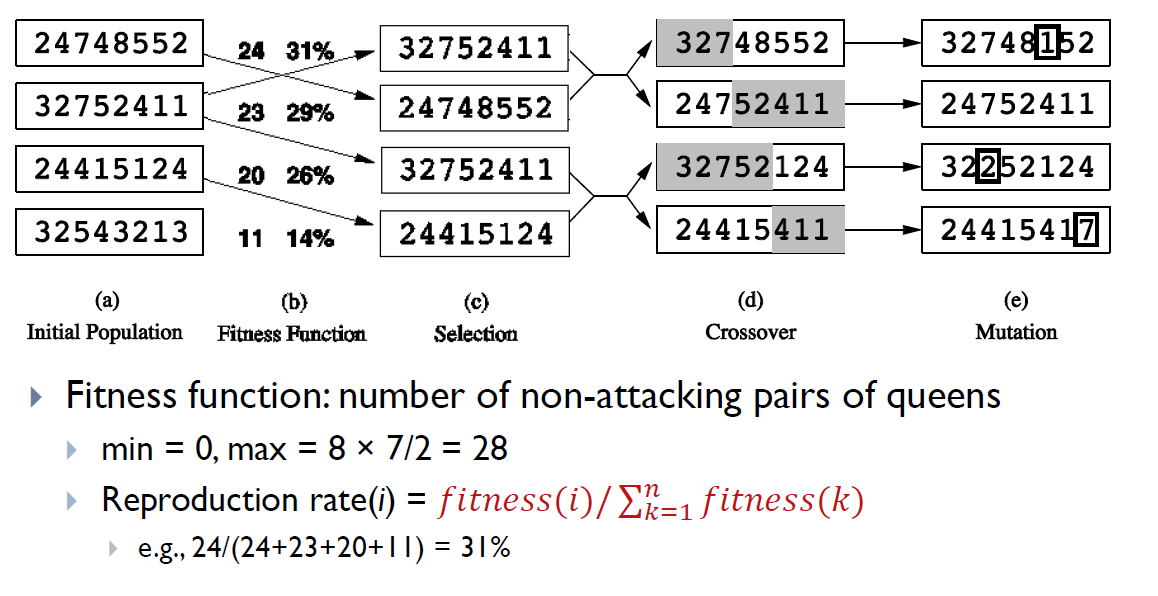

### 8.4. Pros. and Cons.

- **Positive points**
  - Random exploration can find solutions that local search can't (via crossover primarily)

  - Appealing connection to human evaluation ("neural" networks, and "genetic" algorithms are metaphors!)

- **Negative points**
  - Large number of "tunable" parameters
  - Lack of good empirical studies comparing to simpler methods
  - Useful on some (small?) set of problems but no convincing evidence that GAs are better than hill-climbing with random restarts in general

## 9. Summary

All the introduced methods are related to the search problems which are computationally hard. These algorithms move from solution to solution in the space of candidate solutions (the search space) by applying local changes, until a solution deemed optimal is found or a time bound is elapsed.

As mentioned before, in the exploration of search space, the space complexity was exponential; But using these local algorithms, it is reduced to O(1) instead, and the computational time complexity, which was exponential, is reduced to O(T) where T is the number of iterations.




## 10. References



*   [AI course at Sharif University of Technology](http://ce.sharif.edu/courses/99-00/1/ce417-2/index.php/section/resources/file/resources)
*   https://en.wikipedia.org/wiki/Simulated_annealing
